In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'ds2_StudentsPerformance.csv')

In [5]:
print("The first five rows are as follows: ")
df.head()

The first five rows are as follows: 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


In [6]:
print("The last five rows are as follows: ")
df.tail()

The last five rows are as follows: 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99,95
996,male,group C,high school,free/reduced,none,62.0,55,55
997,female,group C,high school,free/reduced,completed,59.0,71,65
998,female,group D,some college,standard,completed,68.0,78,77
999,female,group D,some college,free/reduced,none,77.0,86,86


In [7]:
# Describtion about the dataset
df.describe()

,math score,reading score,writing score
count,933.000000,1000.000000,1000.000000
mean,66.230439,69.169000,68.054000
std,15.053533,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   933 non-null    float64
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [9]:
print("The column names of the dataset are as follows: ")
df.columns

The column names of the dataset are as follows: 


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     67
reading score                   0
writing score                   0
dtype: int64

In [11]:
df['math score'].fillna(df['math score'].mean(), inplace=True)

C:\Users\Saiashish\AppData\Local\Temp\ipykernel_8260\4162807602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)


In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
# Scan for Outliers in Numeric Variables
# Identify numeric variables
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

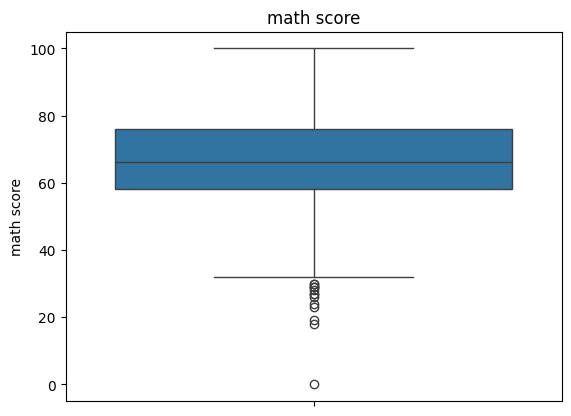

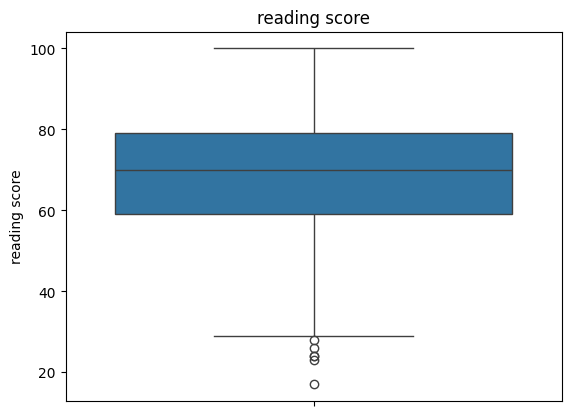

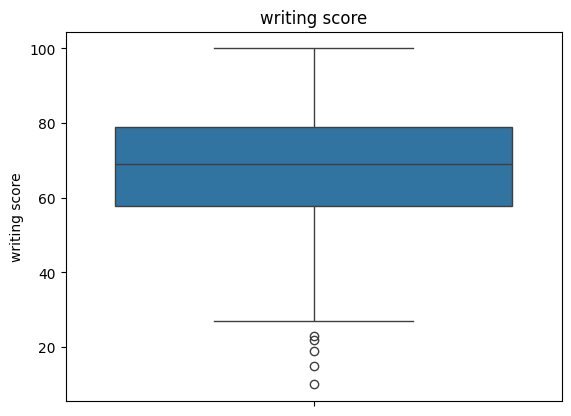

In [14]:
# Visualize outliers (box plot)
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

In [15]:
# Detect outliers (z-score)
from scipy import stats

z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)
outlier_indices = (abs_z_scores > 3).any(axis=1)
outliers = df[outlier_indices]

In [16]:
# Remove outliers
df = df[~outlier_indices]

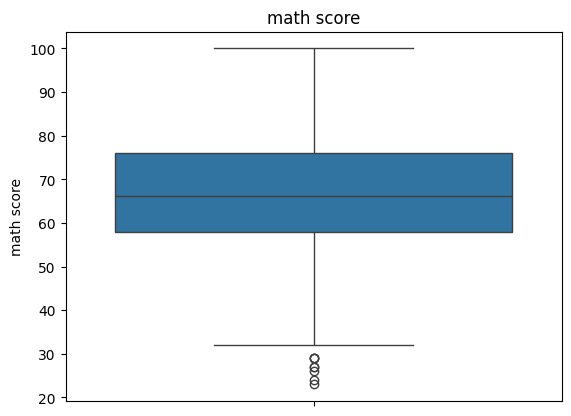

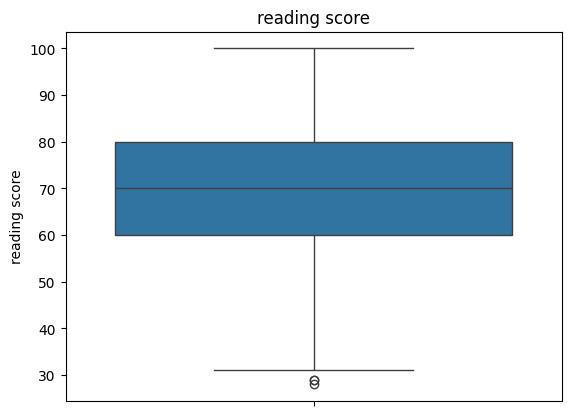

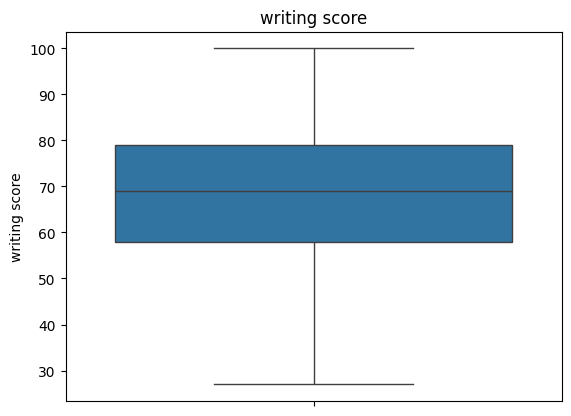

In [17]:
# Visualize outliers (box plot)
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

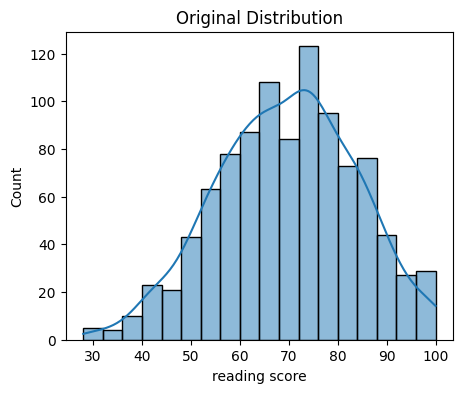

In [18]:
# Apply Data Transformations
# Choose a variable and visualize its distribution. We have chose 'reading score'
plt.figure(figsize=(5, 4)) 
sns.histplot(df['reading score'], kde=True)
plt.title('Original Distribution')
plt.show()

In [19]:
# Apply transformation (e.g., log transformation)
import numpy as np

df['transformed reading score'] = np.log(df['reading score'])

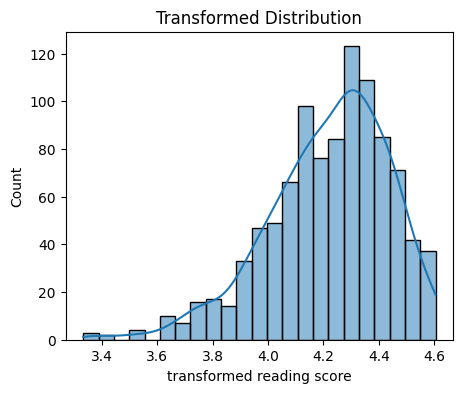

In [20]:
# Visualize transformed distribution
plt.figure(figsize=(5, 4)) 
sns.histplot(df['transformed reading score'], kde=True)
plt.title('Transformed Distribution')
plt.show()